In [ ]:
from CellClass import MCImage, imread
from CellClass.Segment import Segmentation
from CellClass.process_masks import get_cell_patches
from CellClass.Preprocessing import illumination, apply_clahe
import matplotlib.pyplot as plt

CP = Segmentation("cellpose")

In [ ]:
%matplotlib inline
import numpy as np
img = imread("/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/processed/S4_461.tif")
MCIm = MCImage(img, scheme="BGR")
MCIm.normalize()

MCIm.B = apply_clahe(MCIm.B)

_, res, o_dc = DC(MCIm.B, return_outline=True, image_mpp=.4, MCIm=MCIm)
_, res, o_cp = CP(MCIm.B, return_outline=True, MCIm=MCIm)

plt.rcParams['figure.figsize'] = 20,20

plt.imshow(o_dc)
plt.show()
plt.imshow(o_cp)
plt.show()

In [ ]:
from tqdm import tqdm
from CellClass import Analyse as an

import os

base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/results/patches"
files = [os.path.join(base, x) for x in os.listdir(base) if "S29" in x]
print(files)

In [ ]:
patches = []
for f in tqdm(files):
    patches.extend(an.load_patches(f))

In [ ]:
nums, coords, ims, masks = [], [], [], []
for p in patches:
    num, coord, im, mask = *an.get_spots(p.R, p.mask), p.R, p.mask
    nums.append(num)
    coords.append(coord)
    ims.append(im)
    masks.append(mask)

In [ ]:
an.visualize(nums, coords, ims, masks)

In [ ]:
plt.rcParams["figure.figsize"] = 10, 10
an.get_stats(nums)

In [ ]:
an.visualize_nspots(nums, coords, ims, masks, 5)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from CellClass.utils import normalize_image
for n, p in enumerate(patches):
    plt.imshow(np.stack((p.R, np.zeros_like(p.R), p.B), axis=-1))
    plt.imshow(p.mask, alpha=0.1, cmap="gray")
    plt.show()
    
    dog = an.DoG(p.R)
    
    dog[~mask] = 0
    dog = normalize_image(dog)
    
    print(dog.max())
    
    plt.hist(dog[p.mask].ravel(), bins=255, density=True)
    plt.ylim([0,0.5])
    plt.show()
    if n==20:
        break

In [ ]:
def calc_p(l, h, im):
    return sum(im[(im > l) & (im < h)])/len(im)

def calc_w1(t, im,n=100):
    hv = np.linspace(0,t,n)
    return sum([calc_p(hv[i], hv[i+1], im) for i in  range(99)])
    
def calc_w2(t, im, n=100):
    hv = np.linspace(t,1,n)
    return sum([calc_p(hv[i], hv[i+1], im) for i in  range(99)])

def calc_u1(t, im, w1, n=100):
    hv = np.linspace(0,t,n)
    return sum([i*calc_p(hv[i], hv[i+1], im) for i in  range(99)])/w1

def calc_u2(t, im, w2, n=100):
    hv = np.linspace(t,1,n)
    return sum([i*calc_p(hv[i], hv[i+1], im) for i in range(99)])/w2

def calc_tstar(im):
    im = im.ravel()
    hv = np.linspace(0,1,100)
        
    l = []
    for i in range(1,99):
        
        t = hv[i]
        p = calc_p(t, hv[i+1], im)
        
        
        w1 = calc_w1(t, im)
        w2 = calc_w2(t, im)
        
        if w1 != 0 and w2 != 0:
            u1 = calc_u1(t, im, w1)
            u2 = calc_u2(t, im, w2)
            
            l.append((t, (1-p)*(w1*u1**2 + w2+u2**2)))
        
        
    return np.array(l)

In [ ]:
for n, p in enumerate(patches):
    plt.imshow(np.stack((p.R, np.zeros_like(p.R), p.B), axis=-1))
    plt.imshow(p.mask, alpha=0.1, cmap="gray")
    plt.show()
    
    dog = an.DoG(p.R)
    
    dog[~mask] = 0
    dog = normalize_image(dog)
    ts = calc_tstar(dog[mask])

    print(ts[:,1].max())

    plt.hist(dog[p.mask].ravel(), bins=255, density=True)
    plt.show()

    break


In [1]:
import os
import cv2
import numpy as np
from CellClass import evaluate_segmentation as eval
from natsort import natsorted
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm
import pandas as pd

base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/testdata"
files = natsorted([x for x in os.listdir(base) if ".png" in x])

for file in files:
    if "SIMON" in file:
        eval._process_illustrator_output(os.path.join(base, file), os.path.join(base,"simon"))
    elif "FIKRET" in file:
        eval._process_illustrator_output(os.path.join(base, file), os.path.join(base,"fikret"))
        

  0%|          | 0/5 [00:00<?, ?it/s]

(1496, 2048) 1495 2047
(1496, 2048) 528 2044


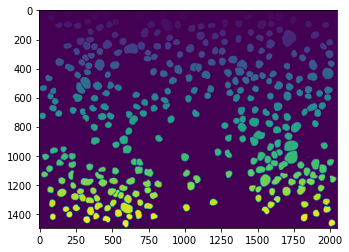

 20%|██        | 1/5 [00:03<00:15,  3.87s/it]

(1496, 2048) 1495 2047
(1496, 2048) 1492 286
(1496, 2048) 1494 1433


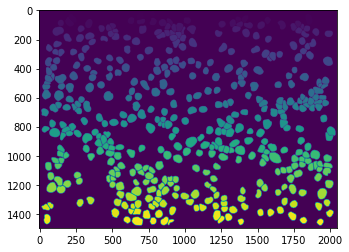

 40%|████      | 2/5 [00:08<00:13,  4.52s/it]

(1496, 2048) 1495 2047
(1496, 2048) 1057 2044


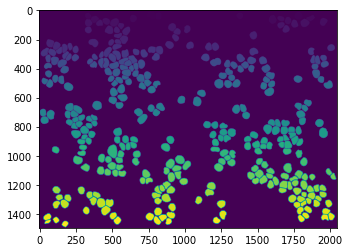

 60%|██████    | 3/5 [00:12<00:08,  4.32s/it]

(1496, 2048) 1495 2047
(1496, 2048) 1494 922


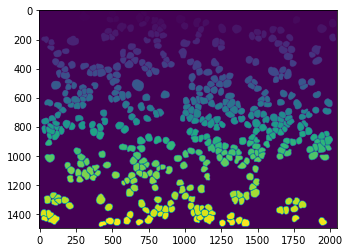

 80%|████████  | 4/5 [00:18<00:04,  4.62s/it]

(1496, 2048) 1495 2047
(1496, 2048) 311 2047
(1496, 2048) 1494 1409


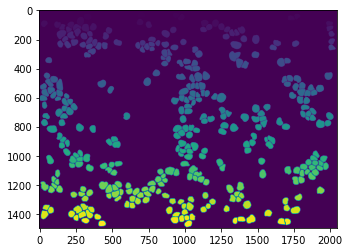

  0%|          | 0/1 [00:00<?, ?it/s]

(1496, 2048) 1495 2047
(1496, 2048) 527 2046


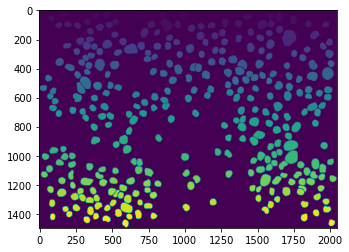

100%|██████████| 1/1 [00:04<00:00,  4.02s/it]


In [2]:
bases = ["/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/testdata/simon", "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/testdata/fikret"]

for base, observer in zip(bases, ["observer0", "observer1"]):
    files = natsorted([x for x in os.listdir(base) if ".png" in x])

    samples = []
    for file in tqdm(files):
        sample = file.split("-")[0]
        im = eval.remove_boarder(eval.load_segmentation(os.path.join(base, file)))
        samples.append({"name": sample, "im": im})
        plt.imshow(im); plt.show()

    locals()[observer] = pd.DataFrame(samples)

In [3]:
base = "/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/MYCN_SpikeIn/testdata/dapi"
files = natsorted([x for x in os.listdir(base) if ".tif" in x.lower()])

samples = []
for file in tqdm(files):
    sample = file.split(".")[0]
    im = cv2.imread(os.path.join(base, file), 0)
    samples.append({"name": sample, "im": im})

locals()["dapi"] = pd.DataFrame(samples)

100%|██████████| 5/5 [00:00<00:00, 15.48it/s]


In [4]:
from CellClass.Segment import Segmentation

CP = Segmentation("cellpose")

2022-06-24 10:46:39.320567: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon_g/anaconda3/envs/CellClass/lib/python3.9/site-packages/cv2/../../lib64:
2022-06-24 10:46:39.320605: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
dfs = []
for _, row in dapi.iterrows():
    _, mask = CP(row.im)
    mask = eval.remove_boarder(mask)
    dfs.append({"name": row["name"], "dapi": row.im, "im": mask})
    

(1496, 2048) 1495 2047
(1496, 2048) 222 2047
(1496, 2048) 266 2047
(1496, 2048) 408 2047
(1496, 2048) 565 2047
(1496, 2048) 637 2047
(1496, 2048) 979 2047
(1496, 2048) 1141 2047
(1496, 2048) 1444 2047
(1496, 2048) 1495 618
(1496, 2048) 1495 742
(1496, 2048) 1495 419
(1496, 2048) 1495 181
(1496, 2048) 1495 103
(1496, 2048) 1495 657
(1496, 2048) 1495 1949
(1496, 2048) 1495 588
(1496, 2048) 1495 795
(1496, 2048) 1495 1706
(1496, 2048) 1495 2047
(1496, 2048) 46 2047
(1496, 2048) 129 2047
(1496, 2048) 284 2047
(1496, 2048) 1152 2047
(1496, 2048) 1495 947
(1496, 2048) 1492 285
(1496, 2048) 1495 1432
(1496, 2048) 1495 1743
(1496, 2048) 1495 517
(1496, 2048) 1495 654
(1496, 2048) 1495 1165
(1496, 2048) 1495 1297
(1496, 2048) 1495 1378
(1496, 2048) 1495 1885
(1496, 2048) 1495 768
(1496, 2048) 1495 1053
(1496, 2048) 1495 1983
(1496, 2048) 1495 1470
(1496, 2048) 1495 1212
(1496, 2048) 1495 697
(1496, 2048) 1495 158
(1496, 2048) 1495 1232
(1496, 2048) 1495 2047
(1496, 2048) 77 2047
(1496, 2048) 31

In [6]:
predictions = pd.DataFrame(dfs)

DAPI_0


100%|██████████| 330/330 [00:04<00:00, 81.17it/s]


False Positives: 2
False Negatives: 6


100%|██████████| 328/328 [00:30<00:00, 10.68it/s]


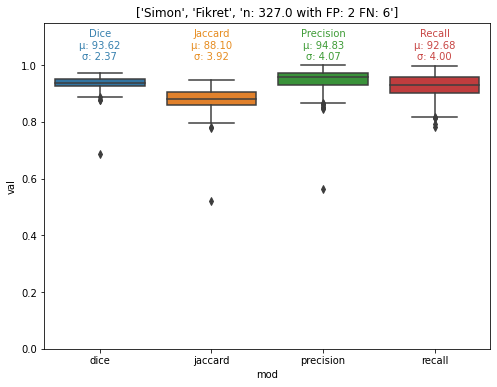

DAPI_0


100%|██████████| 330/330 [00:04<00:00, 75.42it/s]


False Positives: 3
False Negatives: 5


 17%|█▋        | 57/327 [00:05<00:25, 10.75it/s]

In [10]:
import importlib
importlib.reload(eval)

def compare_segmentations(df0, df1, title):

    rets = []
    fps = 0
    fns = 0
    for _, row in df0.iterrows():
        if any(df1['name'].str.contains(row["name"])):
            print(row["name"])
            seg0 = row["im"]
            seg1 = df1[df1["name"]==row["name"]].im.item()
            ret, fp, fn = eval.compare_segmentations(seg0, seg1)
            rets.extend(ret)
            fps += fp
            fns += fn
            
    df = pd.DataFrame(rets)
    d = []
    for n in natsorted(df["mod"].unique()):
        tmp = df[df["mod"] == n]
        d.append({
            "mean": tmp.val.mean(),
            "std": tmp.val.std(),
            "measure": n,
            })
                
    plt.rcParams["figure.figsize"] = 8,6
    ax = sb.boxplot(x="mod", y="val", data=df)
    ax.set_ylim(0, 1.15)

    for info, n, c, val in zip(d, np.linspace(0,3,4), ["#3680AE", "#E68C20", "#3F9C37", "#C84644"], [f"Dice", f"Jaccard",f"Precision",f"Recall"]):
        plt.text(n, 1.07, f"{val}\nµ: {info['mean']*100:.2f}\nσ: {info['std']*100:.2f}", ha="center", va="center", c=c)
       
    ax.set_title([*title, f"n: {len(rets)/4} with FP: {fps} FN: {fns}"])  
    plt.show()   
                
compare_segmentations(observer0, observer1, ["Simon", "Fikret"])  
compare_segmentations(observer0, predictions, ["Simon", "Cellpose"])  
compare_segmentations(observer1, predictions, ["Fikret", "Cellpose"])  